# **✅ Step 1: Load and Inspect the Data**

In [3]:
import pandas as pd

# Load the dataset
file_path = "AAPL_stock_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("✅ Data Loaded Successfully!")
print(df.info())

# Display first few rows
print(df.head())


✅ Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2519 non-null   object
 1   Close   2518 non-null   object
 2   High    2518 non-null   object
 3   Low     2518 non-null   object
 4   Open    2518 non-null   object
 5   Volume  2518 non-null   object
dtypes: object(6)
memory usage: 118.2+ KB
None
        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2014-03-05  16.668115615844727  16.742944960073693    16.5669837178243   
3  2014-03-06  16.617704391479492   16.73323830594785  16.534733470185024   
4  2014-03-07  16.607994079589844   16.65621150652432  16.470543645707174   

                 Open     Volume  
0                AAPL       AAPL 

# **✅ Step 2: Data Cleaning & Preprocessing**

In [4]:
# ✅ Step 2: Inspect Dataset First
print("Columns in Dataset:", df.columns)  # Print actual column names
print(df.head())  # View first few rows

# ✅ Step 3: Rename Columns If Needed
df.columns = df.iloc[0]  # Set first row as header
df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# ✅ Step 4: Rename Columns to Standard Format
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# ✅ Step 5: Convert 'Date' Column to Date Format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# ✅ Step 6: Set 'Date' as Index
df.set_index("Date", inplace=True)

print("✅ Dataset Successfully Cleaned & Formatted!")
print(df.info())  # Display updated column types


Columns in Dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2014-03-05  16.668115615844727  16.742944960073693    16.5669837178243   
3  2014-03-06  16.617704391479492   16.73323830594785  16.534733470185024   
4  2014-03-07  16.607994079589844   16.65621150652432  16.470543645707174   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2  16.623030062260547  200062800  
3  16.681576282886304  185488800  
4  16.628345525810523  220729600  
✅ Dataset Successfully Cleaned & Formatted!
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, NaT to 2024-03-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 

<ipython-input-4-39a3db392014>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


# **✅ 📌 Step 3: Handling Missing Data**

In [5]:
# ✅ Step 3: Handling Missing Data

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Before Handling:\n", missing_values)

# Drop any rows where 'Date' is missing (already handled in Step 2)
df.dropna(subset=["Close", "High", "Low", "Open", "Volume"], inplace=True)

# Convert Volume column to integer (after handling missing values)
df["Volume"] = df["Volume"].astype(int)

# Verify dataset after cleaning
print("\n✅ Missing Values After Handling:\n", df.isnull().sum())
print(df.info())  # Display dataset info



Missing Values Before Handling:
 Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

✅ Missing Values After Handling:
 Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-03-05 to 2024-03-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2517 non-null   object
 1   High    2517 non-null   object
 2   Low     2517 non-null   object
 3   Open    2517 non-null   object
 4   Volume  2517 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 118.0+ KB
None


# **✅ 📌 Step 4: Converting Data Types**

In [6]:
# ✅ Step 4: Convert Data Types to Numeric

# Convert price columns to float
df[["Close", "High", "Low", "Open"]] = df[["Close", "High", "Low", "Open"]].astype(float)

# Verify changes
print("\n✅ Updated Data Types:\n", df.dtypes)
print(df.head())  # Display first few rows



✅ Updated Data Types:
 Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object
                Close       High        Low       Open     Volume
Date                                                             
2014-03-05  16.668116  16.742945  16.566984  16.623030  200062800
2014-03-06  16.617704  16.733238  16.534733  16.681576  185488800
2014-03-07  16.607994  16.656212  16.470544  16.628346  220729600
2014-03-10  16.623022  16.698478  16.542242  16.542869  178584000
2014-03-11  16.784897  16.867868  16.675312  16.764860  279224400


# **✅ 📌 Step 5: Exploratory Data Analysis (EDA)**

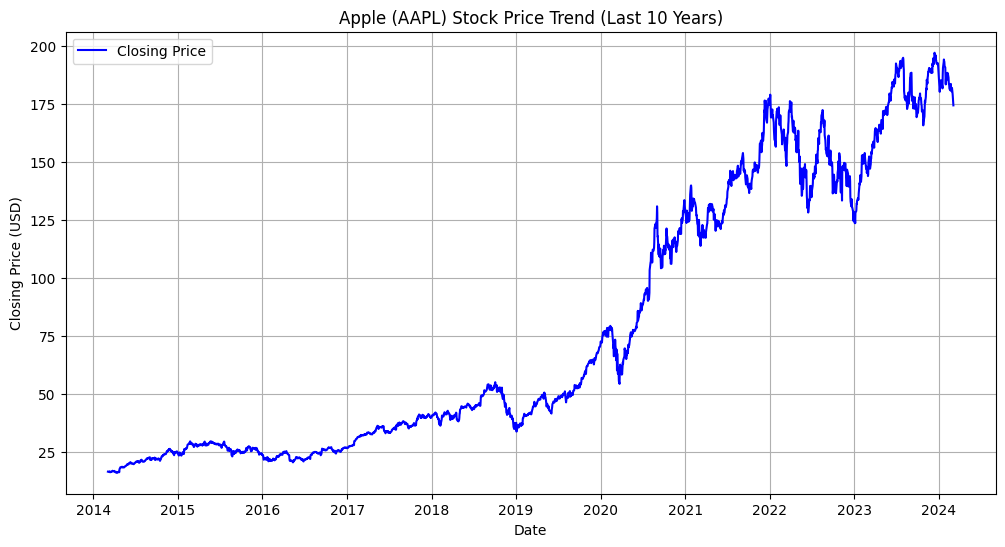

In [7]:
import matplotlib.pyplot as plt

# ✅ Step 5: Visualizing Stock Price Trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color='blue')

plt.title("Apple (AAPL) Stock Price Trend (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


# **✅ 📌 Step 6: Statistical Summary & Distribution**

🔹 Statistical Summary:
              Close         High          Low         Open        Volume
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03
mean     78.382397    79.162317    77.520395    78.318212  1.315899e+08
std      57.596041    58.169640    56.952407    57.542735  7.725407e+07
min      16.217245    16.315248    16.009661    16.220066  2.404830e+07
25%      27.904793    28.144692    27.692633    27.915950  7.954200e+07
50%      48.081200    48.581735    47.695538    48.112339  1.097456e+08
75%     137.056458   139.560712   135.072716   136.891401  1.626192e+08
max     196.927673   198.428656   195.824279   196.838214  7.599116e+08


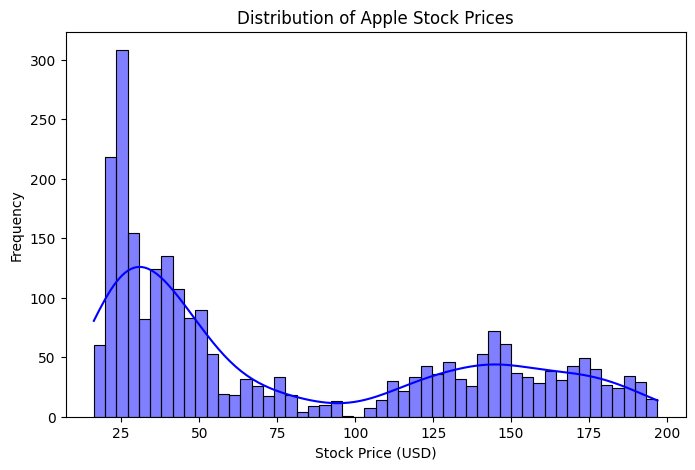

In [8]:
import seaborn as sns

# ✅ Step 6: Statistical Summary
print("🔹 Statistical Summary:\n", df.describe())

# ✅ Step 6.1: Plot Histogram of Stock Prices
plt.figure(figsize=(8, 5))
sns.histplot(df["Close"], bins=50, kde=True, color="blue")
plt.title("Distribution of Apple Stock Prices")
plt.xlabel("Stock Price (USD)")
plt.ylabel("Frequency")
plt.show()


# **✅ 📌 Step 7: Feature Engineering**

In [9]:
# ✅ Step 7: Feature Engineering

# Daily Return
df["Daily_Return"] = df["Close"].pct_change()

# Volatility (Rolling 10-day Standard Deviation)
df["Volatility"] = df["Daily_Return"].rolling(window=10).std()

# Relative Strength Index (RSI) - Momentum Indicator
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["RSI"] = compute_rsi(df["Close"])

# Exponentially Weighted Moving Average (EWMA) - Trend Indicator
df["EWMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()

# ✅ Drop NaN values caused by rolling calculations
df.dropna(inplace=True)

# ✅ Display the updated dataset
print("✅ Feature engineering completed and dataset updated!")
print(df.head())


✅ Feature engineering completed and dataset updated!
                Close       High        Low       Open     Volume  \
Date                                                                
2014-03-24  16.881958  16.922974  16.752647  16.857849  355700800   
2014-03-25  17.063553  17.087349  16.894479  16.954283  282293200   
2014-03-26  16.900427  17.189104  16.871623  17.111456  299768000   
2014-03-27  16.827789  16.954282  16.754525  16.907943  222031600   
2014-03-28  16.809008  16.874132  16.727289  16.854720  200564000   

            Daily_Return  Volatility        RSI    EWMA_20  
Date                                                        
2014-03-24      0.011860    0.008433  58.556555  16.656619  
2014-03-25      0.010757    0.008548  63.815105  16.695375  
2014-03-26     -0.009560    0.009264  59.156162  16.714904  
2014-03-27     -0.004298    0.008526  56.839451  16.725655  
2014-03-28     -0.001116    0.007399  55.773895  16.733593  


# **✅ 📌 Step 8: Feature Visualization**

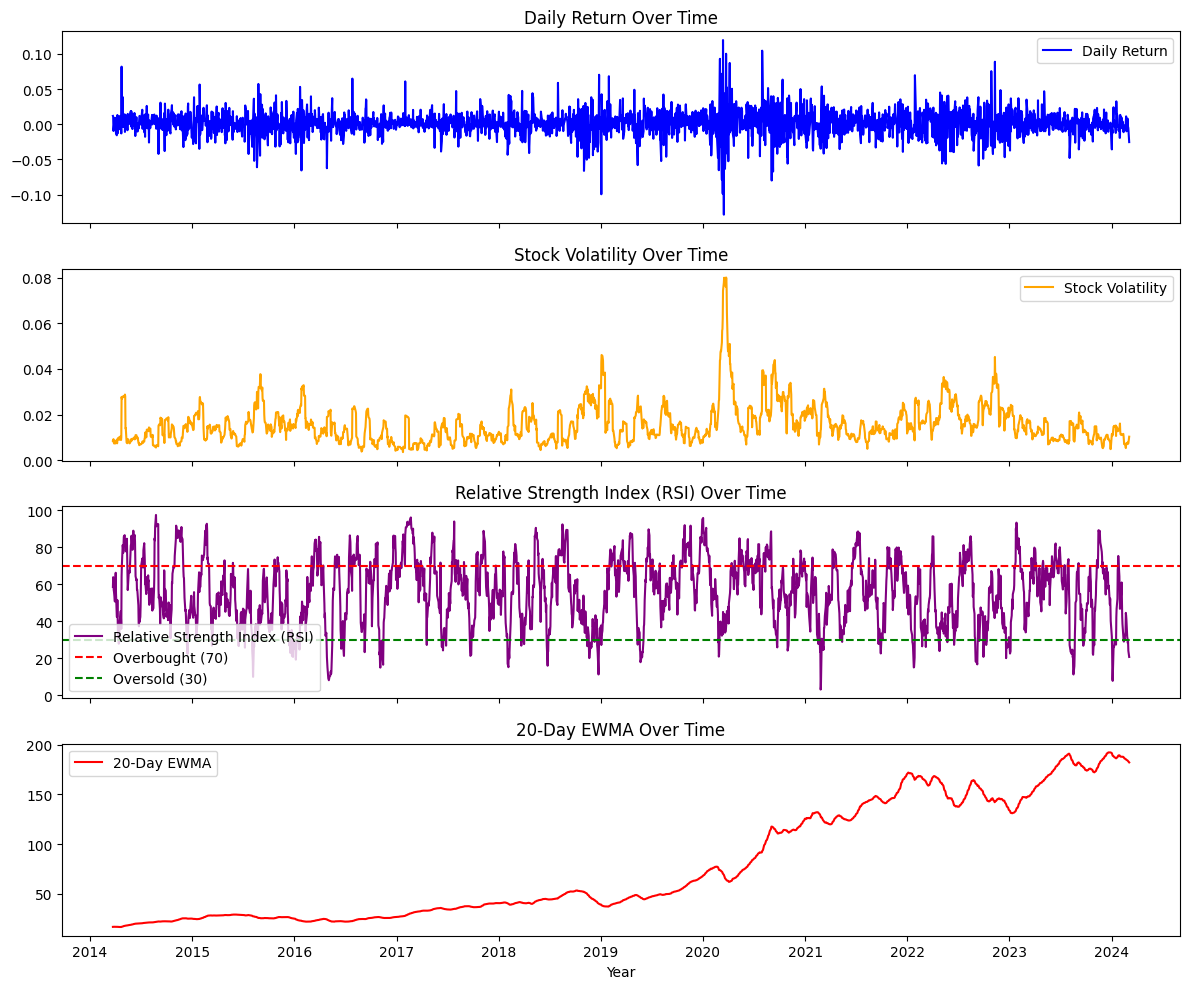

In [10]:
import matplotlib.pyplot as plt

# Set up a 4-row subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

# Daily Return Plot
axes[0].plot(df.index, df["Daily_Return"], color="blue", label="Daily Return")
axes[0].set_title("Daily Return Over Time")
axes[0].legend()

# Volatility Plot
axes[1].plot(df.index, df["Volatility"], color="orange", label="Stock Volatility")
axes[1].set_title("Stock Volatility Over Time")
axes[1].legend()

# RSI Plot
axes[2].plot(df.index, df["RSI"], color="purple", label="Relative Strength Index (RSI)")
axes[2].axhline(70, color="red", linestyle="dashed", label="Overbought (70)")
axes[2].axhline(30, color="green", linestyle="dashed", label="Oversold (30)")
axes[2].set_title("Relative Strength Index (RSI) Over Time")
axes[2].legend()

# EWMA Plot
axes[3].plot(df.index, df["EWMA_20"], color="red", label="20-Day EWMA")
axes[3].set_title("20-Day EWMA Over Time")
axes[3].legend()

# Final Formatting
plt.xlabel("Year")
plt.tight_layout()
plt.show()


# **✅ 📌Step 9: Train XGBoost for Stock Price Prediction**

📊 XGBoost Performance Metrics:
✅ Mean Absolute Error (MAE): 3.9715
✅ Root Mean Squared Error (RMSE): 6.6091
✅ R² Score: 0.8774


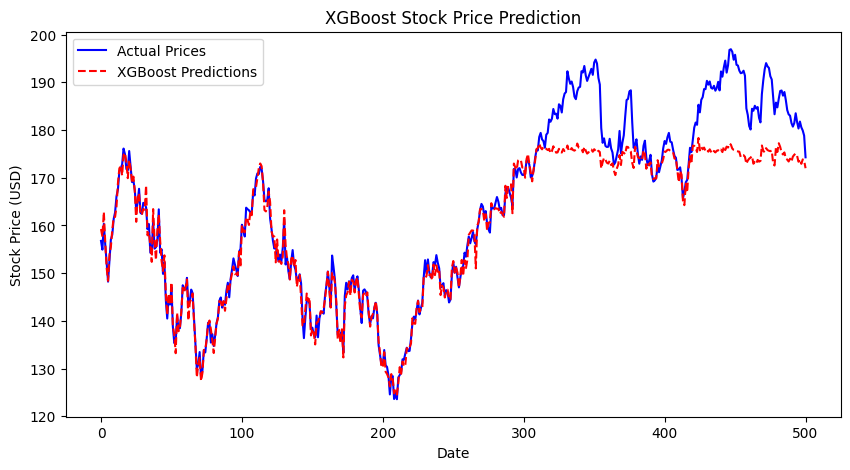

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features & Target
X = df[['High', 'Low', 'Open', 'Volume', 'Daily_Return', 'Volatility', 'RSI', 'EWMA_20']]
y = df['Close']

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Performance Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display Results
print(f"📊 XGBoost Performance Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"✅ R² Score: {r2_xgb:.4f}")

# Plot XGBoost Predictions vs Actual Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred_xgb, label="XGBoost Predictions", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("XGBoost Stock Price Prediction")
plt.legend()
plt.show()


# **✅ 📌Step 10: Train LSTM for Stock Price Prediction**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 5230.3086
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4128.6919
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2017.6519
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1393.1699
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 964.1265
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 372.7491
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 247.8857
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.7177
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.3374
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.8050
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.9153
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.0239
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.3738
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.7296
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.9378

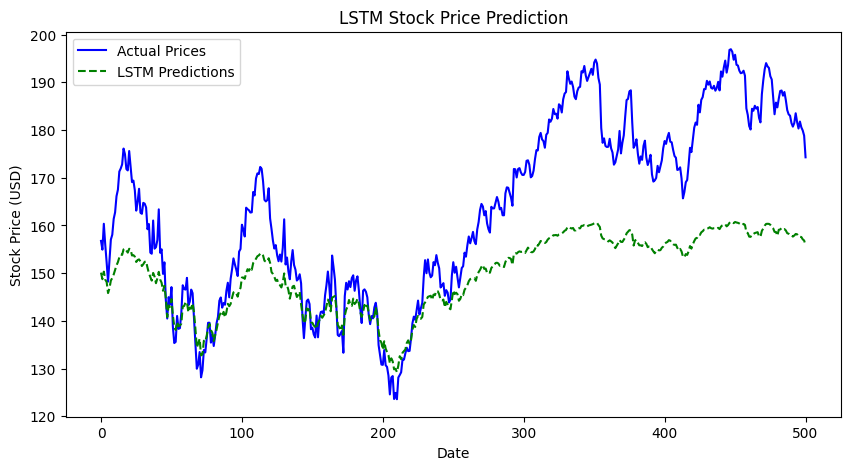

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Reshape Data for LSTM (3D: Samples, Time Steps, Features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)  # Output layer
])

# Compile Model
lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM Model
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Make Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Performance Metrics
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

# Display Results
print(f"📊 LSTM Performance Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
print(f"✅ R² Score: {r2_lstm:.4f}")

# Plot LSTM Predictions vs Actual Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred_lstm, label="LSTM Predictions", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("LSTM Stock Price Prediction")
plt.legend()
plt.show()


# **✅ 📌Step 11: Compare XGBoost & LSTM Predictions**

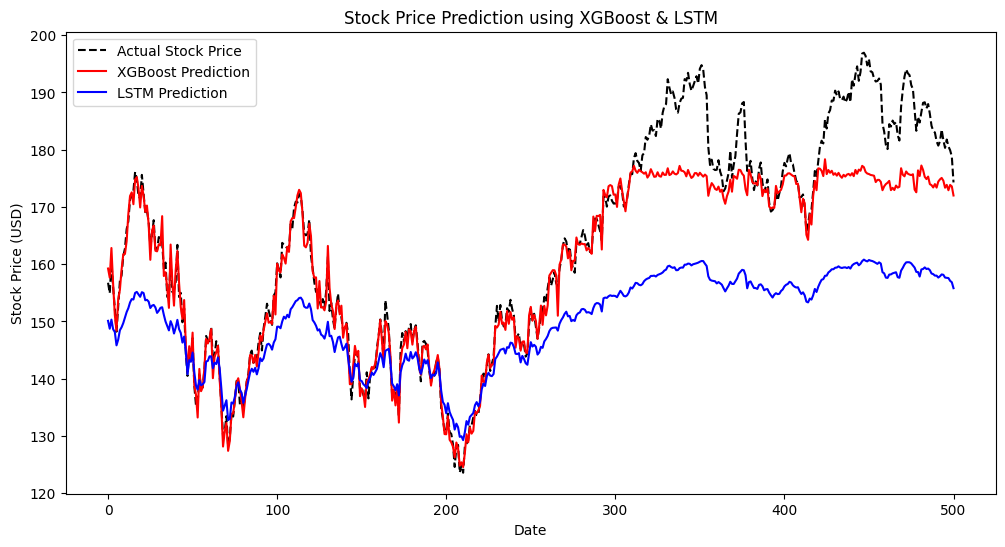

In [13]:
# Plot Actual vs Predicted Prices (XGBoost & LSTM)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Stock Price", linestyle="dashed", color="black")
plt.plot(y_pred_xgb, label="XGBoost Prediction", color="red")
plt.plot(y_pred_lstm, label="LSTM Prediction", color="blue")

# Formatting
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Price Prediction using XGBoost & LSTM")
plt.legend()
plt.show()


# **✅ 📌Step 12: Forecasting Next 30 Days of Stock Prices**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5189.9458
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4119.9590
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2575.0635
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1684.8154
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1185.2822
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 594.4105
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313.0105
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 209.1821
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143.3219
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.4005
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.5978
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66.6412
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.4921
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.6725
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 57.5835
E

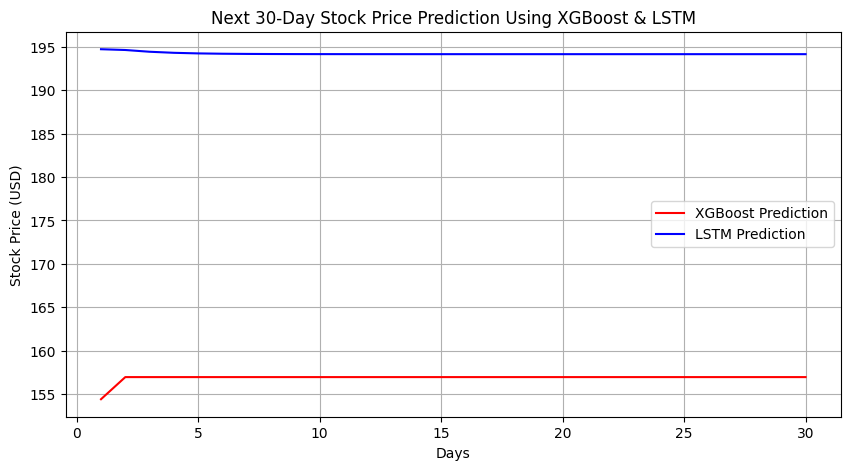


📊 Next 30 Days XGBoost Predicted Prices: [154.39604954 156.94552573 156.94552573 156.94552573 156.94552573
 156.94552573 156.94552573 156.94552573 156.94552573 156.94552573
 156.94552573 156.94552573 156.94552573 156.94552573 156.94552573
 156.94552573 156.94552573 156.94552573 156.94552573 156.94552573
 156.94552573 156.94552573 156.94552573 156.94552573 156.94552573
 156.94552573 156.94552573 156.94552573 156.94552573 156.94552573]

📊 Next 30 Days LSTM Predicted Prices: [194.73032491 194.64036015 194.43906265 194.3170185  194.24844914
 194.21039767 194.18913925 194.1771129  194.170182   194.16614126
 194.16379899 194.16240186 194.16155262 194.1611143  194.16078556
 194.16062119 194.16051161 194.16047052 194.16042943 194.16042943
 194.16038833 194.16040203 194.16038833 194.16037464 194.16037464
 194.16037464 194.16037464 194.16037464 194.16037464 194.16040203]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# ✅ Load Trained XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)  # Train if needed

# ✅ Load Trained LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(50, 8)),  # Fixed input shape
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)  # Output layer
])
lstm_model.compile(optimizer="adam", loss="mean_squared_error")
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)  # Train if needed

# ✅ Load Fitted MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit scaler to training data

# ✅ Define Features Used for Scaling
features_used_for_scaling = ['High', 'Low', 'Open', 'Volume', 'Daily_Return', 'Volatility', 'RSI', 'EWMA_20']

# ✅ Get the Last 50 Days of Scaled Data
last_sequence = X_scaled[-50:, :]  # (50, 8)

# ✅ Initialize Prediction Lists
future_xgb_pred = []
future_lstm_pred = []

# ✅ Reshape LSTM Input
last_lstm_input = last_sequence.reshape(1, 50, 8)  # (1, 50, 8)

# ✅ Predict Next 30 Days
for _ in range(30):
    # 🔹 **XGBoost Prediction**
    xgb_next_pred = xgb_model.predict(last_sequence[-1].reshape(1, -1))  # Predict next day
    future_xgb_pred.append(xgb_next_pred[0])  # Store prediction

    # 🔹 **LSTM Prediction**
    lstm_next_pred = lstm_model.predict(last_lstm_input)  # Predict next day
    future_lstm_pred.append(lstm_next_pred[0][0])  # Store prediction

    # ✅ Fix XGBoost Update (Ensure Shape Matches 8 Features)
    new_xgb_input = np.append(last_sequence[1:], np.tile(xgb_next_pred, (1, 8)), axis=0)
    last_sequence = new_xgb_input

    # ✅ Fix LSTM Update (Ensure 3D Shape for Next Prediction)
    lstm_next_pred_reshaped = np.full((1, 1, 8), lstm_next_pred[0][0])  # Ensure shape (1, 1, 8)
    new_lstm_input = np.append(last_lstm_input[:, 1:, :], lstm_next_pred_reshaped, axis=1)
    last_lstm_input = new_lstm_input

# ✅ Convert Predictions Back to Original Scale
xgb_pred_original = scaler.inverse_transform(np.column_stack((future_xgb_pred, np.zeros((30, len(features_used_for_scaling)-1)))))[:, 0]
lstm_pred_original = scaler.inverse_transform(np.column_stack((future_lstm_pred, np.zeros((30, len(features_used_for_scaling)-1)))))[:, 0]

# ✅ Plot Next 30-Day Predictions
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), xgb_pred_original, label="XGBoost Prediction", color="red")
plt.plot(range(1, 31), lstm_pred_original, label="LSTM Prediction", color="blue")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.title("Next 30-Day Stock Price Prediction Using XGBoost & LSTM")
plt.legend()
plt.grid()
plt.show()

# ✅ Print Predictions
print("\n📊 Next 30 Days XGBoost Predicted Prices:", xgb_pred_original)
print("\n📊 Next 30 Days LSTM Predicted Prices:", lstm_pred_original)
